
# Estimating the Market Risk of a Stock II - Applied
In this walkthrough, you'll learn how to calculate the risk of a multi asset portfolio.

Remember that Beta of a stock $j$ is calculated as...
$$\beta_j = \frac{\sigma_{r_j,r_m}}{\sigma_{r_m}^2} \equiv \frac{\frac{1}{n-1}\sum_{t=1}^n(r_j-E[r_j])(r_m-E[r_m])}{\frac{1}{n-1}\sum_{t=1}^n(r_m-E[r_m])^2}
$$

Where:  
$\sigma_{r_j,r_m} = $ Covariance between $r_j$ and $r_m$  
$\sigma_{r_m}^2 = $ Variance of the market  
$r_j = $ Return on a stock $j$  
$r_m = $ Return on the market  
$E[r_j] = $ Expected Return on a stock $j$  
$E[r_m] = $ Expected Return on the market  

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [25]:
df = pd.read_csv("AAPL_SP_10y.csv")
df.set_index('date', inplace=True)

In [26]:
returns_df = df.pct_change(1)

In [102]:
df

,price_t_AAPL,price_t_SP500
date,,
2009-02-02,11.317137,825.440002
2009-02-03,11.498934,838.510010
2009-02-04,11.569427,832.229980
2009-02-05,11.929309,845.849976
2009-02-06,12.332478,868.599976
...,...,...
2019-12-23,282.562683,3224.010010
2019-12-24,282.831299,3223.379883
2019-12-26,288.442780,3239.909912


In [101]:
returns_df

,r_aapl,r_sp500
date,,
2009-02-03,0.016064,0.015834
2009-02-04,0.006130,-0.007490
2009-02-05,0.031106,0.016366
2009-02-06,0.033797,0.026896
2009-02-09,0.027978,0.001485
...,...,...
2019-12-23,0.016318,0.000866
2019-12-24,0.000951,-0.000195
2019-12-26,0.019840,0.005128


In [28]:
returns_df.dropna(inplace=True)

In [93]:
new_col_names = ['r_aapl', 'r_sp500']
returns_df.columns = new_col_names

In [103]:
deviations = returns_df - returns_df.mean()
deviations

,r_aapl,r_sp500
date,,
2009-02-03,0.014744,0.015287
2009-02-04,0.004811,-0.008037
2009-02-05,0.029787,0.015819
2009-02-06,0.032477,0.026349
2009-02-09,0.026659,0.000938
...,...,...
2019-12-23,0.014999,0.000319
2019-12-24,-0.000369,-0.000742
2019-12-26,0.018521,0.004581


In [32]:
# Sanity check
# Estimate the deviation of the first observation of APPL
returns_df['r_appl'].iloc[0] - returns_df['r_appl'].mean()

0.01474432402676137

In [85]:
# Rename columns to better represent the data
new_col_names = ['deviations_appl', 'deviations_sp500']
deviations.columns = new_col_names

In [86]:
# Calculate the product of deviations
# Note that this will be a pandas Series object, and NOT a pandas Dataframe object.
product_deviations = deviations['deviations_appl'] * deviations['deviations_sp500']
product_deviations.head()

date
2009-02-03    0.000225
2009-02-04   -0.000039
2009-02-05    0.000471
2009-02-06    0.000856
2009-02-09    0.000025
dtype: float64

In [87]:
# Calculate the covariance as the sum of the product of deviations divided by N-1
cov_appl_sp500 = product_deviations.sum() / (len(product_deviations) - 1)
cov_appl_sp500

0.00010210746024651252

In [88]:
var_sp500 = np.var(returns_df['r_sp500'], ddof=1)

In [89]:
var_sp500

0.00010196082083718508

In [90]:
beta_appl = cov_appl_sp500 / var_sp500

In [91]:
beta_appl

1.0014381936916887

In [98]:
np.cov(returns_df['r_sp500'], returns_df['r_aapl'])[0][1]

0.00010210746024651252

In [100]:
linregress(y=returns_df['r_aapl'], x=returns_df['r_sp500'])

LinregressResult(slope=1.0014381936916887, intercept=0.000771754499230783, rvalue=0.6097128420776966, pvalue=2.7248322936079543e-279, stderr=0.024852672107424603)

In [104]:
def calculateBeta(df, stock, market):

    #find the returns of appl and market

    df['r_stock'] = df[stock] / df[stock].shift(1) - 1

    df['r_market'] = df[market] / df[market].shift(1) - 1

   

    df['expected_return_stock'] = df['r_stock'].mean()

    df['expected_return_market'] = df['r_market'].mean()

   

    df['deviations'] = (df['r_stock'] - df['expected_return_stock']) * (df['r_market'] - df['expected_return_market'])

    sum_deviations = df['deviations'].sum()

   

    n = len(df['deviations'].dropna())

    cov_stock_market = sum_deviations / (n-1)

   

    df['squared_deviations_market'] = (df['r_market'] - df['expected_return_market'])**2

    sum_squared_deviations_market = df['squared_deviations_market'].sum()

    var_market = sum_squared_deviations_market / (n-1)

    beta_stock = cov_stock_market/ var_market

   

    return beta_stock




#betais 1.037946144051677
# price_t_AAPL	price_t_SP500

In [105]:
calculateBeta(df, 'price_t_AAPL', 'price_t_SP500')


1.001438193691689

In [162]:
def read_data(filename_stock ,filename_market):
    global df_j 
    global df_m

 
    df_j = pd.read_csv(filename_stock)
    df_j = df[['Date', 'Adj Close']]  # Extract relevant columns only

    df_j.rename(
        columns={'Date' : 'date', 'Adj Close' : 'price_t'},
        inplace=True)  # Rename so it's closer to PEP8 standards
    
    df_m = pd.read_csv(filename_market)
    df_m = df[['Date', 'Adj Close']]  # Extract relevant columns only

    df_m.rename(
        columns={'Date' : 'date', 'Adj Close' : 'price_t'},
        inplace=True)  # Rename so it's closer to PEP8 standards
    
    
    return df_j 
    return df_m

    

In [163]:
read_data('AAPL_10y.csv','SP_10y.csv')

df_m


/home/junfan/Documents/python/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,date,price_t
0,2009-01-02,11.223147
1,2009-01-05,11.696809
2,2009-01-06,11.503882
3,2009-01-07,11.255305
4,2009-01-08,11.464305
...,...,...
2762,2019-12-23,282.562683
2763,2019-12-24,282.831299
2764,2019-12-26,288.442780
2765,2019-12-27,288.333313


In [164]:
pd.read_csv('SP_10y.csv')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-02-02,823.090027,830.780029,812.869995,825.440002,825.440002,5673270000
1,2009-02-03,825.690002,842.599976,821.979980,838.510010,838.510010,5886310000
2,2009-02-04,837.770020,851.849976,829.179993,832.229980,832.229980,6420450000
3,2009-02-05,831.750000,850.549988,819.909973,845.849976,845.849976,6624030000
4,2009-02-06,846.090027,870.750000,845.419983,868.599976,868.599976,6484100000
...,...,...,...,...,...,...,...
2742,2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3060610000
2743,2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296540000
2744,2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2160680000
2745,2019-12-27,3247.229980,3247.929932,3234.370117,3240.020020,3240.020020,2428670000


In [157]:
df_m

,date,price_t
0,2009-01-02,11.223147
1,2009-01-05,11.696809
2,2009-01-06,11.503882
3,2009-01-07,11.255305
4,2009-01-08,11.464305
...,...,...
2762,2019-12-23,282.562683
2763,2019-12-24,282.831299
2764,2019-12-26,288.442780
2765,2019-12-27,288.333313


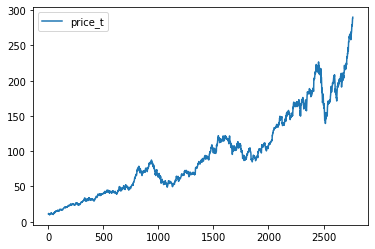

In [151]:
df_j.plot()